## Imports

In [26]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
dir_files = '../Dataset/'
col_labels = [
    'Dev_ID',
    'Acc_X',
    'Acc_Y',
    'Acc_Z',
    'Gyr_X',
    'Gyr_Y',
    'Gyr_Z',
    'Mag_X',
    'Mag_Y',
    'Mag_Z',
    'Timestamp',
    'Act_Label'
]

act_labels = [
    'Stand',
    'Sit',
    'Sit_Talk',
    'Walk',
    'Walk_Talk',
    'Climb_Stair',
    'Climb_Stair_talk',
    'Stand_Sit',
    'Sit_Stand',
    'Stand_Sit_Talk',
    'Sit_Stand_Talk',
    'Stand_Walk',
    'Walk_Stand',
    'Stand_Climb_Stairs_Talk',
    'Climb_Stairs_Walk',
    'Climb_Stairs_Talk_Walk_Talk'
]

modules_labels = [
    'Acc_Dens',
    'Gyr_Dens',
    'Mag_Dens'
]

k_values = [
    3,
    3.5,
    4
]

## Read Files

In [28]:
def read_file(id=0, dev=2):
    file_path = dir_files + 'part' + str(id) + '/part' + str(id) + 'dev' + str(dev) + '.csv'

    csv_file = open(file_path)
    csv_reader = csv.reader(csv_file, delimiter=',')
    data_np = np.array(list(csv_reader)).astype(float)

    data = pd.DataFrame(data_np)
    data.columns = col_labels
    
    return [data,data_np]
    

[data,data_np] = read_file()
data

,Dev_ID,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Timestamp,Act_Label
0,2.0,3.0317,9.0450,3.1739,0.762470,3.70710,-0.313840,0.57764,0.68849,1.26540,63.629,1.0
1,2.0,2.9591,9.0436,3.1400,0.405880,4.66820,-0.101480,0.58385,0.68849,1.27410,83.160,1.0
2,2.0,2.9465,9.0545,3.0799,0.242300,5.52250,0.348570,0.56522,0.67857,1.26750,102.690,1.0
3,2.0,2.7898,9.0528,3.0726,0.498580,6.34630,0.611270,0.56108,0.65476,1.26100,122.220,1.0
4,2.0,2.6924,9.0377,2.9794,0.631970,6.69720,1.005600,0.57764,0.69246,1.26750,141.750,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52859,2.0,2.3837,9.0681,3.4339,-0.429610,-1.75440,-0.300480,0.35197,0.88294,0.69737,1039200.000,1.0
52860,2.0,2.4075,8.9945,3.3985,-0.279800,-1.72390,0.129850,0.35197,0.86706,0.69079,1039200.000,1.0
52861,2.0,2.3837,9.0316,3.4346,-0.043147,-0.77803,0.195980,0.32919,0.84722,0.69956,1039300.000,1.0
52862,2.0,2.3236,9.0922,3.4472,-0.125830,-0.56445,-0.016121,0.33747,0.88889,0.70614,1039300.000,1.0


## Outliers Density

In [29]:
def calc_mod(data, n_act=16):
    acc = list()
    gyr = list()
    mag = list()

    for act in range(1, n_act+1):
        activity = data.loc[data['Act_Label'] == act]

        df_acc = pd.DataFrame(np.sqrt((activity['Acc_X']**2 + activity['Acc_Y']**2 + activity['Acc_Z']**2)))
        df_acc.columns=[act]
        acc.append(df_acc)

        df_gyr = pd.DataFrame(np.sqrt((activity['Gyr_X']**2 + activity['Gyr_Y']**2 + activity['Gyr_Z']**2)))
        df_gyr.columns=[act]
        gyr.append(df_gyr)

        df_mag = pd.DataFrame(np.sqrt((activity['Mag_X']**2 + activity['Mag_Y']**2 + activity['Mag_Z']**2)))
        df_mag.columns=[act]
        mag.append(df_mag)
    
    acc = pd.concat(acc)
    gyr = pd.concat(gyr)
    mag = pd.concat(mag)

    return [acc,gyr,mag]

[acc,gyr,mag] = calc_mod(data)

## Density

In [30]:
def getDensity(data,i):
    quart = data[i].quantile([0.25,0.75])
    iqr = quart[0.75] - quart[0.25]
    lim = [quart[0.25] - iqr, quart[0.75] + iqr]

    values = data.loc[(data[i] < lim[0]) | (data[i] > lim[1]),[i]]
    
    return values.shape[0] / data.shape[0] * 100

,Acc_Dens,Gyr_Dens,Mag_Dens
0,2.559398,2.243493,4.844507
1,0.830433,0.959065,0.000000
2,1.144446,0.993114,0.472912
3,1.517100,0.365088,1.848139
4,1.257945,0.658293,1.256053
5,1.091480,0.353738,0.000000
6,0.391571,0.270505,0.000000
7,0.234564,0.113499,0.149440
8,0.143765,0.138090,0.092691
9,0.211864,0.147548,0.145657


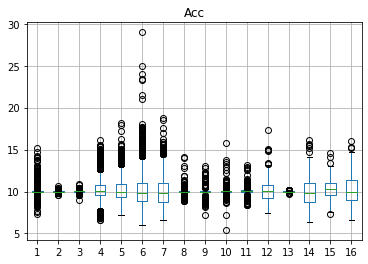

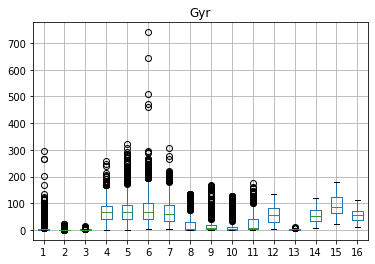

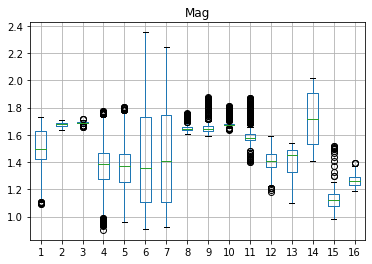

In [69]:
def plotBoxplot(acc,gyr,mag,n_act=16):
    density = [[],[],[]]

    for i in range(1,n_act+1):
        dens_acc = getDensity(acc, i)
        density[0].append(dens_acc)

        dens_gyr = getDensity(gyr, i)
        density[1].append(dens_gyr)

        dens_mag = getDensity(mag, i)
        density[2].append(dens_mag)

        # plt.figure()
        # col = [n for n in range(i,min(i+3,n_act+1))]
        # for j in col:
        # acc.boxplot(column=col)

    for i in range(len(density)):
        density[i] = pd.DataFrame(density[i])
        density[i].columns = [modules_labels[i]]
        
    density = pd.concat(density,axis=1)

    plt.figure()
    acc.boxplot()
    plt.title('Acc')

    plt.figure()
    gyr.boxplot()
    plt.title('Gyr')
    
    plt.figure()
    mag.boxplot()
    plt.title('Mag')
    
    return density
density = plotBoxplot(acc,gyr,mag)
density

## Z-Score

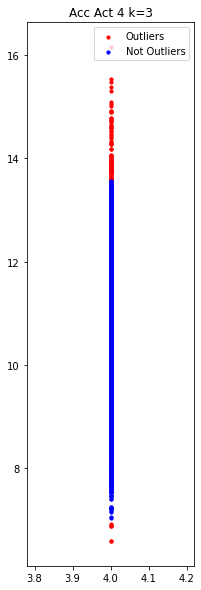

In [74]:
def zscore(vector,k):
    z = (vector - vector.mean()) / vector.std()
    
    out = z.loc[(z < -k) | (z > k)]
    not_out = z.loc[(z >= -k) & (z <= k)]

    return [out.index,not_out.index]

def outliersZscore(vector,vec_name,acts=[1]):
    n_outliers = list() 
        
    for i in range(len(k_values)):
        k=k_values[i]
        k_out = list()
        for act in acts:
            [out_pos,not_out_pos] = zscore(vector[act],k)

            k_out.append(out_pos.shape[0])

            out = vector.loc[out_pos,]
            not_out = vector.loc[not_out_pos,]

            plt.figure(figsize=(3*(i+1),10))

            plt.subplot(1,len(k_values),i+1)
            plt.scatter(np.full((1,out.shape[0]),act),out[act],s=10,c='red',label='Outliers')
            plt.scatter(np.full((1,not_out.shape[0]),act),not_out[act],s=10,c='blue',label='Not Outliers')
            plt.title(vec_name + ' Act ' + str(act) + ' k=' + str(k))
            plt.legend()
            
            # threedee = plt.figure().gca(projection='3d')
            # threedee.scatter(not_out[vec_name+'_X'],not_out[vec_name+'_Y'],not_out[vec_name+'_Z'],c='blue',label='Not Outliers')
            # threedee.scatter(out[vec_name+'_X'],out[vec_name+'_Y'],out[vec_name+'_Z'],c='red',label='Outliers')
            # title = vec_name + ' Act=' + str(act) + ' k=' + str(k)
            # plt.title(title)
            # threedee.legend()
            # plt.show()
        
        df = pd.DataFrame(k_out)
        df.columns = [vec_name + ' ' + str(k)]
        df.index = acts
        n_outliers.append(df)

    n_outliers = pd.concat(n_outliers,axis=1)
    return n_outliers
    
acts = [4]
out_acc = outliersZscore(acc,'Acc',acts)
# out_gyr = outliersZscore(gyr,'Gyr',acts)
# out_mag = outliersZscore(mag,'Mag',acts)

# out = pd.concat([out_acc,out_gyr,out_mag],axis=1)
# out

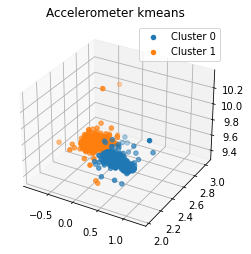

In [33]:
def assign_clusters(data, centroids):
    for index, row in data.iterrows():
        for i in range(len(centroids)):
            d_actual = np.sqrt((row['X'] - centroids[int(row['Clusters'])][0])**2 + (row['Y'] - centroids[int(row['Clusters'])][1])**2 + (row['Z'] - centroids[int(row['Clusters'])][2])**2)
            d_compare = np.sqrt((row['X'] - centroids[i][0])**2 + (row['Y'] - centroids[i][1])**2 + (row['Z'] - centroids[i][2])**2)
            if (d_actual > d_compare):
                data['Clusters'][index] = i
    return data

def update_centroids(data, centroids):
    for i in range(len(centroids)):
        centroids[i][0] = data['X'].loc[data['Clusters'] == i].mean()
        centroids[i][1] = data['Y'].loc[data['Clusters'] == i].mean()
        centroids[i][2] = data['Z'].loc[data['Clusters'] == i].mean()
    
    return centroids
        
def k_means(n_clusters, data):
    centroids = [[] for _ in range(n_clusters)]
    
    for i in range(n_clusters):
        centroids[i] = data.sample().to_numpy()[0]
        
    data['Clusters'] = 0
    prev_clusters = data['Clusters'].copy()
    
    while(True):
        data = assign_clusters(data, centroids)
        
        if (data['Clusters'].equals(prev_clusters)):
            break
        
        centroids = update_centroids(data, centroids)
        prev_clusters = data['Clusters'].copy()
        
    return [data, centroids]
    

def outliers_kmeans(n_clusters, data, act):
    data = data.loc[data['Act_Label'] == act]
    
    acc_xyz = data[['Acc_X', 'Acc_Y', 'Acc_Z']]
    acc_xyz = acc_xyz.rename(columns={"Acc_X":"X", "Acc_Y":"Y", "Acc_Z":"Z"})
    gyr_xyz = data[['Gyr_X', 'Gyr_Y', 'Gyr_Z']]
    gyr_xyz = gyr_xyz.rename(columns={'Gyr_X':'X', 'Gyr_Y':'Y', 'Gyr_Z':'Z'})
    mag_xyz = data[['Mag_X', 'Mag_Y', 'Mag_Z']]
    mag_xyz = mag_xyz.rename(columns={'Mag_X':'X', 'Mag_Y':'Y', 'Mag_Z':'Z'})
    
    [acc_xyz, centroids] = k_means(n_clusters, acc_xyz)
#     [gyr_xyz, centroids] = k_means(n_clusters, gyr_xyz)
#     [mag_xyz, centroids] = k_means(n_clusters, mag_xyz)
    
    
    # %matplotlib notebook
    threedee = plt.figure().gca(projection='3d')
    for i in range(n_clusters):
        cluster_label = 'Cluster '+str(i)
        plot_data = acc_xyz.loc[acc_xyz['Clusters'] == i]
        threedee.scatter(plot_data['X'], plot_data['Y'], plot_data['Z'], marker='o', label=cluster_label)
    title = 'Accelerometer kmeans'
    plt.title(title)
    threedee.legend()
    
    
    
#     fig2 = plt.figure()
#     ax = plt.axes(projection='3d')
#     for i in range(n_clusters):
#         plot_data = gyr_xyz.loc[gyr_xyz['Clusters'] == i]
#         ax.scatter3D(plot_data['X'], plot_data['Y'], plot_data['Z'])
    
#     fig3 = plt.figure()
#     ax = plt.axes(projection='3d')
#     for i in range(n_clusters):
#         plot_data = mag_xyz.loc[mag_xyz['Clusters'] == i]
#         ax.scatter3D(plot_data['X'], plot_data['Y'], plot_data['Z'])
    
    return acc_xyz
    
centroids = outliers_kmeans(2, data, 2)